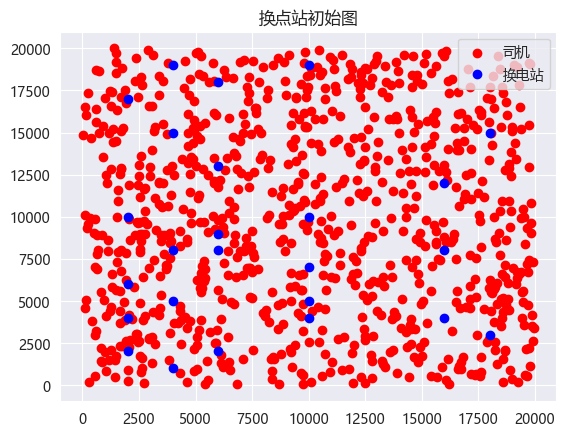

In [78]:
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

n = 900 #换电需求 25 stations for example
A = np.random.normal(36,5,25)

max_price = 250
min_price = 150
E = np.floor(A) #去尾法
A = A + ((n - sum(E))/25)
E = np.floor(A)  #这几步都是为了让A的和为900

a1 = 0.05 
a2 = 0.95 #权重设置
x = [random.random()*20000 for _ in range(n)] # from 0 to 20000 , the random float
y = [random.random()*20000 for _ in range(n)]
H = np.mat([[2,2],[2,4],[2,6],[2,10],[2,17],
           [4,5],[4,8],[4,1],[4,15],[4,19],
           [6,2],[6,8],[6,9],[6,13],[6,18],
           [10,5],[10,7],[10,4],[10,10],[10,19],
           [16,4],[18,3],[18,15],[16,12],[16,8]])* 1000
plt.scatter(x,y,color='r',label = "司机")
plt.plot(H[:,0],H[:,1],'bo',label = "换电站")
plt.legend(loc="upper right",scatterpoints=1)
plt.title("换点站初始图")
plt.show()


In [82]:
D = np.zeros((len(H),n))
price = 200*np.ones((1,25))
print(price)
for i in range(len(H)):
    for j in range(n):
        D[i,j] = a1*np.sqrt((H[i,0]-x[j])**2 + (H[i,1]-y[j])**2) +a2 * price[0,i]
D = D.T
D = D.tolist()
d2 = [D[i].index(np.min(D[i])) for i in range(n)] #找到每一列（即每个换电站）中最小值的索引，即哪个车辆对该换电站的需求比例最小
C = Counter(d2) #计算实际的车辆使用
e = list(C.values())
err = sum(abs(E - e)) #博弈对象
J = [] #价格变化差值
ER = [err]
for k in range(1,100):
    j = 0
    for i in range(len(H)):
        if e[i] < E[i] and price[0,i] >= min_price:
            price[0,i] = price[0,i] - 1
            j += 1
        if e[i] > E[i] and price[0,i] <= max_price:
            j +=1
    J.append(j) #记录每一次调整价格
    DD = np.zeros((len(H),n)) #需求车辆到换电站的需求比例
    for i in range(len(H)):
       for j in range(n):
            DD[i,j] = a1*np.sqrt((H[i,0]-x[j])**2 + (H[i,1]-y[j])**2) +a2 * price[0,i]
    DD = DD.T
    DD = DD.tolist()
    dd2 = [DD[i].index(np.min(DD[i])) for i in range(n)]
    C = Counter(dd2)
    e = [C[i] for i in sorted(C.keys())]
    err = sum(abs(E - e)) #博弈对象
    ER.append(err)


[[200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
  200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.]]


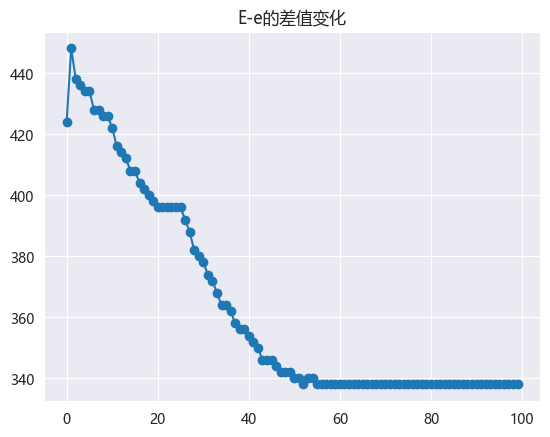

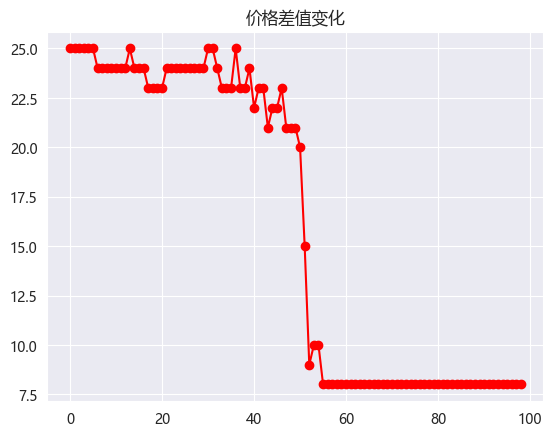

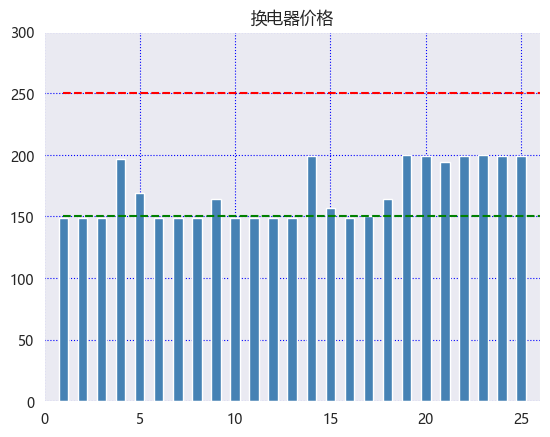

In [92]:
plt.plot(ER,"-o")
plt.title("E-e的差值变化")
plt.show()
plt.plot(J,"r-o")
plt.title("价格差值变化")
plt.show()
plt.bar(x=range(1,26),
        height=price[0,:],
        width=0.5,
        color='steelblue')
plt.plot([1,26],[min_price,min_price],'g--')
plt.plot([1,26],[max_price,max_price],'r--')
plt.title("换电器价格")
plt.grid(ls=":",c="b")
plt.axis([0,26,0,300])
plt.show()


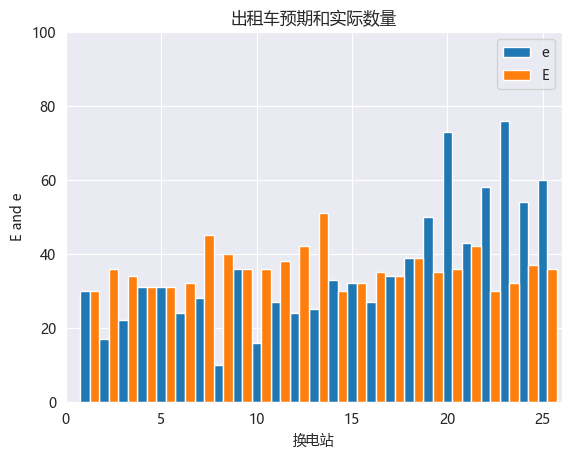

In [90]:
index = np.arange(1,26)
plt.bar(index,e,width=0.5)
plt.bar(index+0.5,E,width=0.5)
plt.axis([0,26,0,100])
plt.title("出租车预期和实际数量")
plt.ylabel('E and e')
plt.xlabel("换电站")
plt.legend(['e','E'])
plt.show()
